In [76]:
import matplotlib.pyplot as plt 
import numpy as np

In [93]:
# example VPD's
vpd=[1.2,1.3,1.4, 1, 1.2, 1.5,2,1.3, 1.2,1.3,1.4, 1, 1.2, 1.5,2,1.3]

# example initial soil moisture
sm_0 = 50

# example samples of params
sampled_b0b1=[[1, -0.05], [0.99, -0.049], [1.02, -0.042], [0.98, -0.045], [1.02, -0.049]]

# list for saving results of soil moisture
sm_list=[]
sm_list_random=[]

In [94]:
# compute estimations for each iteration using same params daily
for params in sampled_b0b1:
    b0 = params[0]
    b1 = params[1]
    sm = sm_0
    estimations=[sm]
    for obs in vpd:
        sm = sm * (b0 + b1*obs)
        estimations.append(sm)
    sm_list.append(estimations)
    
# compute estimations for each iteration using random params daily
for params in sampled_b0b1:
    sm = sm_0
    estimations=[sm]
    for obs in vpd:
        param=np.random.randint(0,5)
        b0 = sampled_b0b1[param][0]
        b1 = sampled_b0b1[param][1]
        sm = sm * (b0 + b1*obs)
        estimations.append(sm)
    sm_list_random.append(estimations)       

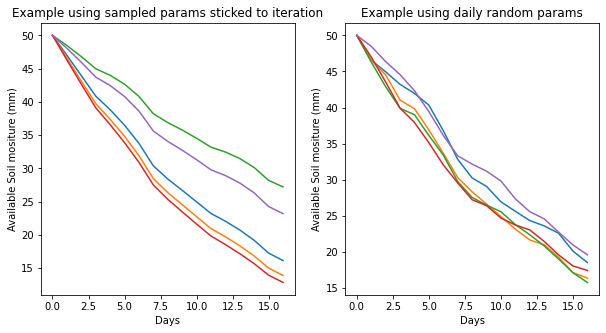

In [96]:
plt.figure(figsize=(10,5))
ax=plt.subplot(121)
for est in sm_list:
    ax.set_title("Example using sampled params sticked to iteration")
    ax.plot([0,1,2,3,4,5,6,7,8, 9, 10, 11, 12, 13, 14, 15, 16],est)
    ax.set_xlabel("Days")
    ax.set_ylabel("Available Soil mositure (mm)")


ax=plt.subplot(122)
for est in sm_list_random:
    ax.set_title("Example using daily random params")
    ax.plot([0,1,2,3,4,5,6,7,8, 9, 10, 11, 12, 13, 14, 15, 16],est)
    ax.set_xlabel("Days")
    ax.set_ylabel("Available Soil mositure (mm)")
plt.show()
    
    